In [2]:
################## 가중치 키워드만 사용함. 엄마아빠 둘다 여기서 돌림 ##########
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [3]:
f_data = pd.read_csv('C:/Users/Hyejin Jeon/Documents/Python Scripts/clean_f.csv')
m_data = pd.read_csv('C:/Users/Hyejin Jeon/Documents/Python Scripts/clean_m.csv')

In [4]:
fw_keyword = list(f_data.w_keyword)
mw_keyword = list(m_data.w_keyword)

In [5]:
#############  F_W_KEYWORD //// M_W_KEYWORD #######################

# 일반적으로 꼬꼬마나 okt를 사용하여 토큰화 하겠지만 여기서는 엑셀 데이터가 이미 키워드를 제공하기 때문에 키워드 및 가중 키워드 정보를 그냥 사용할 예정 
# 기존 리스트는 한 문서가 하나의 리스트로 묶어서 제공, 한 문서(리스트) 내의 단어들을 각각 문자열화 해줘야함

data_fwkey =[]
for i in range(len(fw_keyword)) :
    data_fwkey.append(fw_keyword[i].split(','))
    
# 위의 코드 줄이면 = data_fkey = [words.split(',') for words in f_keyword]

data_mwkey = []
for i in range(len(mw_keyword)):
    data_mwkey.append(mw_keyword[i].split(','))

In [6]:
data_fwkey[0:5]

[['베일리',
  '런던',
  '보수당',
  '노동당',
  '영국',
  '무슬림',
  '이민자',
  '경찰관',
  '사디크',
  '흙수저',
  '보좌관',
  '공공주택'],
 ['id',
  '미혼부',
  '그간',
  '뽐뿌',
  '보호자',
  '아이들',
  '동반자',
  '클리앙',
  '출생신고',
  '비혼',
  '사각지대',
  '장유경',
  '양육비'],
 ['여가부',
  '비혼',
  '민법',
  '개정안',
  '출생신고',
  '난임',
  '사실혼',
  '현두륜',
  '미혼부',
  '법무부',
  '이명진',
  '혼인신고'],
 ['여가부',
  '개정안',
  '육아휴직',
  '양육비',
  '미혼부',
  '출생신고',
  '24세',
  '우선주',
  '아동양육비',
  '법무부',
  '건강가정기본계획',
  '주민등록번호',
  '25세',
  '민법',
  '김민아',
  '34세',
  '정영애',
  '혼인신고'],
 ['일자리',
  'imf',
  '칼바람',
  '고려대',
  '김승섭',
  '항공기',
  '남성들',
  '여성들',
  '가계수입',
  '여기저기',
  '날벼락',
  '화장실',
  '만큼',
  '음식점업',
  '賣血',
  '김정현',
  '직업교육',
  '자영업',
  '서울역',
  '침구관리',
  '아이들',
  '인구수축사회',
  '비정규직',
  '한국',
  '금융업',
  '서비스업',
  '세신',
  '보건과학']]

In [7]:
data_mwkey[0:5]

[['베일리',
  '런던',
  '보수당',
  '노동당',
  '영국',
  '무슬림',
  '이민자',
  '경찰관',
  '사디크',
  '흙수저',
  '보좌관',
  '공공주택'],
 ['여가부',
  '비혼',
  '민법',
  '개정안',
  '출생신고',
  '난임',
  '사실혼',
  '현두륜',
  '미혼부',
  '법무부',
  '부성',
  '이명진',
  '혼인신고'],
 ['여가부',
  '개정안',
  '부성',
  '육아휴직',
  '양육비',
  '미혼부',
  '출생신고',
  '24세',
  '우선주',
  '아동양육비',
  '법무부',
  '건강가정기본계획',
  '주민등록번호',
  '25세',
  '민법',
  '김민아',
  '34세',
  '정영애',
  '혼인신고'],
 ['자민당',
  '스가',
  '중의원',
  '홋카이도',
  '히로시마',
  '입헌민주당',
  '보궐선거',
  '선거구',
  '나가노',
  '하타',
  '국회의원',
  '일본',
  '미야구치',
  '참의원',
  '유권자',
  '가와이'],
 ['자민당',
  '중의원',
  '스가',
  '홋카이도',
  '히로시마',
  '입헌민주당',
  '보궐선거',
  '선거구',
  '나가노',
  '하타',
  '국회의원',
  '미야구치',
  '참의원',
  '유권자',
  '가와이']]

In [8]:
from gensim import corpora, models
import gensim

# fw_keyword
fw_keywords = data_fwkey # 앞에 설정한 리스트는 's'포함안된 그냥 keyword
dictionary_fw = corpora.Dictionary(fw_keywords)
corpus_fw = [dictionary_fw.doc2bow(text) for text in fw_keywords]
print(corpus_fw[1])

[(12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)]


In [9]:
# mw_keyword
mw_keywords = data_mwkey # 앞에 설정한 리스트는 's'포함안된 그냥 keyword
dictionary_mw = corpora.Dictionary(mw_keywords)
corpus_mw = [dictionary_mw.doc2bow(text) for text in mw_keywords]
print(corpus_mw[1])

[(12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)]


In [10]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

In [16]:
cohere_val_fwkey = []
for i in range(2,20):
    lda_fwkey = gensim.models.ldamodel.LdaModel(corpus_fw, num_topics = i, id2word = dictionary_fw, alpha = 0.1, passes = 10)
    cohere_model_lda_fwkey = CoherenceModel(model = lda_fwkey, texts = fw_keywords, dictionary = dictionary_fw, topn = 10)
    cohere_lda_fwkey = cohere_model_lda_fwkey.get_coherence()
    cohere_val_fwkey.append(cohere_lda_fwkey)

In [17]:
cohere_val_mwkey = []
for i in range(2,20):
    lda_mwkey = gensim.models.ldamodel.LdaModel(corpus_mw, num_topics = i, id2word = dictionary_mw, alpha = 0.1, passes = 10)
    cohere_model_lda_mwkey = CoherenceModel(model = lda_mwkey, texts = mw_keywords, dictionary = dictionary_mw, topn = 10)
    cohere_lda_mwkey = cohere_model_lda_mwkey.get_coherence()
    cohere_val_mwkey.append(cohere_lda_mwkey)

In [18]:
cohere_val_fwkey[0:20] # topic N == 7 highest 0 부터 하면 6

[0.2021094284128475,
 0.33070809300935267,
 0.2396023713702499,
 0.28425061752818975,
 0.28468445999367414,
 0.29016737908853124,
 0.41530945445838396,
 0.3751899427159156,
 0.30912650322193813,
 0.300410123187653,
 0.29434166184868366,
 0.2831564679639802,
 0.3220371798001955,
 0.29088517905885725,
 0.32825741682910836,
 0.3638408757058162,
 0.302089667194313,
 0.3522665665074814]

In [19]:
cohere_val_mwkey[0:20] # topic N == 10 highest 0부터 하면 9

[0.19259078711546318,
 0.27404642296649057,
 0.24381823129999725,
 0.2688985963096763,
 0.28999473433595085,
 0.27338270518260666,
 0.30291432601514223,
 0.26341028540679207,
 0.2966801561513451,
 0.3888666859772229,
 0.2981008702175821,
 0.27754881695490563,
 0.281946511039609,
 0.3032545054534059,
 0.30801021772781884,
 0.3387525344207492,
 0.3077379271086504,
 0.30450518021050216]

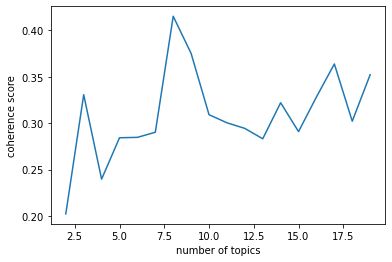

In [20]:
x = range(2,20)
plt.plot(x, cohere_val_fwkey)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()

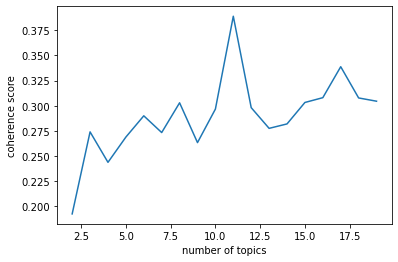

In [21]:
x = range(2,20)
plt.plot(x, cohere_val_mwkey)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()

In [35]:
# 각 단어 앞에 붙은 수치는 단어의 해당 토픽에 대한 기여도를 보여줍니다.

import gensim 

NUM_TOPICS = 7
lda_fwkey = gensim.models.ldamodel.LdaModel(corpus_fw, num_topics = NUM_TOPICS, id2word = dictionary_fw, passes =15, alpha = 0.1)
topics_fwkey = lda_fwkey.print_topics(num_words = 10)
for topic in topics_fwkey:
    print(topic)

(0, '0.010*"서울" + 0.007*"한국" + 0.006*"관계자" + 0.006*"미국" + 0.005*"확진자" + 0.004*"우리나라" + 0.004*"일자리" + 0.004*"사람들" + 0.004*"위원회" + 0.003*"민주당"')
(1, '0.012*"미국" + 0.012*"민주당" + 0.009*"확진자" + 0.008*"공화당" + 0.007*"바이든" + 0.007*"부통령" + 0.005*"백악관" + 0.004*"1명" + 0.004*"서울" + 0.004*"도널드"')
(2, '0.011*"확진자" + 0.007*"민주당" + 0.007*"미국" + 0.006*"사람들" + 0.005*"서울" + 0.004*"청와대" + 0.004*"아이들" + 0.004*"신천지" + 0.004*"대구" + 0.003*"지지율"')
(3, '0.006*"서울" + 0.005*"확진자" + 0.004*"노동자" + 0.004*"정치인" + 0.004*"민주당" + 0.004*"대구" + 0.004*"어린이집" + 0.004*"아이들" + 0.004*"a씨" + 0.004*"20대"')
(4, '0.014*"서울" + 0.005*"아이들" + 0.005*"확진자" + 0.004*"민주당" + 0.004*"위원장" + 0.004*"대한민국" + 0.003*"a씨" + 0.003*"사람들" + 0.003*"시간date" + 0.003*"서울시"')
(5, '0.009*"확진자" + 0.007*"서울" + 0.007*"미국" + 0.006*"사람들" + 0.005*"온라인" + 0.005*"아이들" + 0.004*"민주당" + 0.004*"중국" + 0.004*"더불어민주당" + 0.004*"재택근무"')
(6, '0.010*"확진자" + 0.010*"서울" + 0.006*"a씨" + 0.004*"감염병" + 0.004*"광화문" + 0.004*"미국" + 0.004*"b씨" + 0.004*"위원장" + 0.003*"접촉자" + 0.003*"부산시

In [36]:
NUM_TOPICS = 10
lda_mwkey = gensim.models.ldamodel.LdaModel(corpus_mw, num_topics = NUM_TOPICS, id2word = dictionary_mw, passes =15, alpha = 0.1)
topics_mwkey = lda_mwkey.print_topics(num_words = 10)
for topic in topics_mwkey:
    print(topic)

(0, '0.019*"확진자" + 0.016*"서울" + 0.010*"a씨" + 0.008*"미국" + 0.007*"접촉자" + 0.007*"민주당" + 0.006*"인천" + 0.006*"관계자" + 0.005*"인천시" + 0.005*"자가격리"')
(1, '0.008*"서울" + 0.007*"아이들" + 0.006*"사람들" + 0.005*"확진자" + 0.005*"a씨" + 0.005*"의료진" + 0.004*"시간date" + 0.004*"가족들" + 0.004*"보건소" + 0.003*"온라인"')
(2, '0.008*"확진자" + 0.007*"a씨" + 0.007*"미국" + 0.006*"어린이집" + 0.005*"서울" + 0.005*"인천" + 0.005*"의료진" + 0.004*"아이들" + 0.004*"한국" + 0.004*"접촉자"')
(3, '0.010*"확진자" + 0.009*"서울" + 0.006*"광화문" + 0.005*"문재인" + 0.005*"제일교회" + 0.005*"페이스북" + 0.004*"사람들" + 0.004*"차명진" + 0.003*"청와대" + 0.003*"접촉자"')
(4, '0.008*"아이들" + 0.008*"서울" + 0.006*"노동자" + 0.006*"김씨" + 0.006*"미국" + 0.006*"확진자" + 0.005*"재택근무" + 0.004*"시간date" + 0.004*"일자리" + 0.004*"온라인"')
(5, '0.018*"서울" + 0.015*"확진자" + 0.008*"인천" + 0.007*"민주당" + 0.006*"대구" + 0.006*"이낙연" + 0.006*"미국" + 0.005*"이태원" + 0.005*"더불어민주당" + 0.004*"한국"')
(6, '0.009*"서울" + 0.007*"확진자" + 0.004*"아이들" + 0.004*"접촉자" + 0.004*"미국" + 0.003*"민주당" + 0.003*"한국" + 0.003*"청와대" + 0.003*"부모님" + 0.003*"어

In [37]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

In [38]:
vis_fwkey = pyLDAvis.gensim_models.prepare(lda_fwkey, corpus_fw, dictionary_fw)
pyLDAvis.display(vis_fwkey)

In [39]:
vis_mwkey = pyLDAvis.gensim_models.prepare(lda_mwkey, corpus_mw, dictionary_mw)
pyLDAvis.display(vis_mwkey)